In [77]:
## Vaishu Myadam (vmyadam1208@gmail.com)
## June, 2020

## Twitter credentials are hidden for security purposes

In [78]:
# Necessary imports

from textblob import TextBlob # for sentiment polarity
import sys, tweepy, csv, re
import matplotlib.pyplot as plt

In [79]:
class LiveTweetsSentimentAnalysis:

    def __init__(self):
        
        self.tweets = []
        self.text_from_tweets = []
        
        # To keep track of the sentiments
        
        self.positive = 0
        self.wpositive = 0
        self.spositive = 0
        self.negative = 0
        self.wnegative = 0
        self.snegative = 0
        self.neutral = 0
        
        self.polarity = 0
        
        self.num_of_tweets = 0
        self.topic_name = ''
        
    # Helper methods
    
    def clean_tweet_text(self, tweet):
        
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w +:\ / \ / \S +)", " ", tweet).split())
    
    def get_percentage(self, part, whole):
        
        temp = 100 * float(part) / float(whole)
        return format(temp, '.2f')

    def analyze(self):
        
        self.get_tweets()
        self.do_calculations()
        self.save_tweets()
        self.summary()
        self.visualize()
        
    def get_tweets(self):

        consumerKey = 'hidden'
        consumerSecret = 'hidden'
        accessToken = 'hidden'
        accessTokenSecret = 'hidden'
        auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
        auth.set_access_token(accessToken, accessTokenSecret)
        api = tweepy.API(auth)
    
        self.topic_name = input("What would you like to search about? ")
        try:
            self.num_of_tweets = int(input("How many tweets would you like to search for? "))
        except ValueError:
            self.num_of_tweets = int(input("How many tweets would you like to search for? (Please enter a numeric value) "))
        while (self.num_of_tweets < 1):
            self.num_of_tweets = int(input("How many tweets would you like to search for? (Please enter a number greater than 0 this time) "))
        
        self.tweets = tweepy.Cursor(api.search, q = self.topic_name, lang = "en").items(self.num_of_tweets)
    
    def do_calculations(self):
        
        for tweet in self.tweets:
            
            # Saving tweet text for csv file
            self.text_from_tweets.append(self.clean_tweet_text(tweet.text).encode('utf-8')) 
            
            analysis = TextBlob(tweet.text)
            self.polarity += analysis.sentiment.polarity

            if (analysis.sentiment.polarity == 0): 
                self.neutral += 1
            elif (analysis.sentiment.polarity > 0 and analysis.sentiment.polarity <= 0.3):
                self.wpositive += 1
            elif (analysis.sentiment.polarity > 0.3 and analysis.sentiment.polarity <= 0.6):
                self.positive += 1
            elif (analysis.sentiment.polarity > 0.6 and analysis.sentiment.polarity <= 1):
                self.spositive += 1
            elif (analysis.sentiment.polarity > -0.3 and analysis.sentiment.polarity <= 0):
                self.wnegative += 1
            elif (analysis.sentiment.polarity > -0.6 and analysis.sentiment.polarity <= -0.3):
                self.negative += 1
            elif (analysis.sentiment.polarity > -1 and analysis.sentiment.polarity <= -0.6):
                self.snegative += 1

        # Individual average sentiments
        
        self.positive = self.get_percentage(self.positive, self.num_of_tweets)
        self.wpositive = self.get_percentage(self.wpositive, self.num_of_tweets)
        self.spositive = self.get_percentage(self.spositive, self.num_of_tweets)
        self.negative = self.get_percentage(self.negative, self.num_of_tweets)
        self.wnegative = self.get_percentage(self.wnegative, self.num_of_tweets)
        self.snegative = self.get_percentage(self.snegative, self.num_of_tweets)
        self.neutral = self.get_percentage(self.neutral, self.num_of_tweets)
        
        # Overall average sentiment
        
        self.polarity = self.polarity / self.num_of_tweets 
        
    def save_tweets(self):
        
        csvFile = open('saved_tweets.csv', 'a')
        csvWriter = csv.writer(csvFile)
        csvWriter.writerow(self.text_from_tweets)
        csvFile.close()
        
    def summary(self):
        
        print("How are people reacting to " + self.topic_name + "? (By analyzing " + str(self.num_of_tweets) + " tweets)")
        print("\nSummary:\n")

        if (self.polarity == 0):
            print("Neutral")
        elif (self.polarity > -0.3 and self.polarity <= 0):
            print("Weakly Negative")
        elif (self.polarity > -0.6 and self.polarity <= -0.3):
            print("Negative")
        elif (self.polarity > -1 and self.polarity <= -0.6):
            print("Strongly Negative")    
        elif (self.polarity > 0 and self.polarity <= 0.3):
            print("Weakly Positive")
        elif (self.polarity > 0.3 and self.polarity <= 0.6):
            print("Positive")
        elif (self.polarity > 0.6 and self.polarity <= 1):
            print("Strongly Positive")
        

        print("\nSpecific Reactions:\n")
        print(str(self.positive) + "% of the tweets were positive")
        print(str(self.wpositive) + "% of the tweets were weakly positive")
        print(str(self.spositive) + "% of the tweets were strongly positive")
        print(str(self.negative) + "% of the tweets were negative")
        print(str(self.wnegative) + "% of the tweets were weakly negative")
        print(str(self.snegative) + "% of the tweets were strongly negative")
        print(str(self.neutral) + "% of the tweets were neutral")
        
    def visualize(self):
        
        labels = ['Positive (' + str(self.positive) + '%)', 'Weakly Positive (' + str(self.wpositive) + '%)','Strongly Positive (' + str(self.spositive) + '%)', 'Neutral (' + str(self.neutral) + '%)',
                  'Negative (' + str(self.negative) + '%)', 'Weakly Negative (' + str(self.wnegative) + '%)', 'Strongly Negative (' + str(self.snegative) + '%)']
        sizes = [self.positive, self.wpositive, self.spositive, self.neutral, self.negative, self.wnegative, self.snegative]
        colors = ['limegreen','lightgreen','darkgreen', 'yellow', 'red','pink','darkred']
        explode = list()
        for k in labels:
            explode.append(0.2)
        
        pie = plt.pie(sizes, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%1.1f%%')
        plt.title("How are people reacting to " + self.topic_name + "? (By analyzing " + str(self.num_of_tweets) + " tweets)")
        plt.axis('equal')
        plt.tight_layout()
        plt.show()

What would you like to search about? vegetarianism
How many tweets would you like to search for? not an integer
How many tweets would you like to search for? (Please enter a numeric value) -1
How many tweets would you like to search for? (Please enter a number greater than 0 this time) 0
How many tweets would you like to search for? (Please enter a number greater than 0 this time) 50
How are people reacting to vegetarianism? (By analyzing 50 tweets)

Summary:

Weakly Negative

Specific Reactions:

4.00% of the tweets were positive
4.00% of the tweets were weakly positive
2.00% of the tweets were strongly positive
12.00% of the tweets were negative
64.00% of the tweets were weakly negative
0.00% of the tweets were strongly negative
14.00% of the tweets were neutral


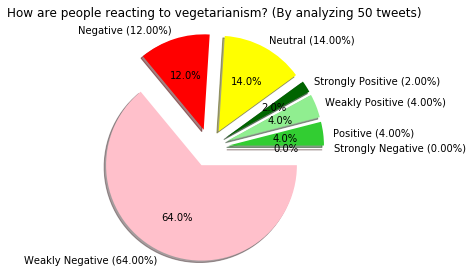

In [81]:
if __name__== "__main__":
    
    live_tweets_analyzer = LiveTweetsSentimentAnalysis()
    live_tweets_analyzer.analyze()